<h2 style="text-align:center">LAB4</h2>

<p>Name: Kushal Sourav B</p>
<p>Regno: 2347125</p>

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.cluster import KMeans
import numpy as np


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)



In [21]:


class RBFLayer(tf.keras.layers.Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = tf.constant(gamma, dtype=tf.float32)
    
    def build(self, input_shape):
        
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='random_uniform',
                                       trainable=False)
    
    def call(self, inputs):
      
        diff = tf.expand_dims(inputs, axis=1) - self.centers
        l2 = tf.reduce_sum(tf.square(diff), axis=-1)
        return tf.exp(-self.gamma * l2)

In [22]:


def build_rbf_network(input_shape, num_classes, num_rbf_units, gamma):
    inputs = tf.keras.Input(shape=input_shape)
    
   
    rbf_layer = RBFLayer(num_rbf_units, gamma, name='rbf_layer')(inputs)
   
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(rbf_layer)
   
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    return model

input_shape = (784,)  
num_classes = 10 
num_rbf_units = 100  
gamma = 0.1  


model = build_rbf_network(input_shape, num_classes, num_rbf_units, gamma)


model.summary()


kmeans = KMeans(n_clusters=num_rbf_units)
kmeans.fit(X_train)


rbf_layer = model.get_layer('rbf_layer')

rbf_layer.centers.assign(kmeans.cluster_centers_)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rbf_layer (RBFLayer)            │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,410 (310.20 KB)

 Trainable params: 1,010 (3.95 KB)

 Non-trainable params: 78,400 (306.25 KB)

<tf.Tensor: shape=(100, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [19]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0680 - loss: 2.3011 - val_accuracy: 0.1238 - val_loss: 2.2832
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1309 - loss: 2.2778 - val_accuracy: 0.1243 - val_loss: 2.2615
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1330 - loss: 2.2569 - val_accuracy: 0.1524 - val_loss: 2.2408
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1850 - loss: 2.2338 - val_accuracy: 0.2633 - val_loss: 2.2215
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3021 - loss: 2.2149 - val_accuracy: 0.3144 - val_loss: 2.2033
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3281 - loss: 2.2003 - val_accuracy: 0.3374 - val_loss: 2.1864
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3464 - loss: 2.1797 - val_accuracy: 0.3617 - val_loss: 2.1708
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3680 - loss: 2

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Accuracy: 72.16%


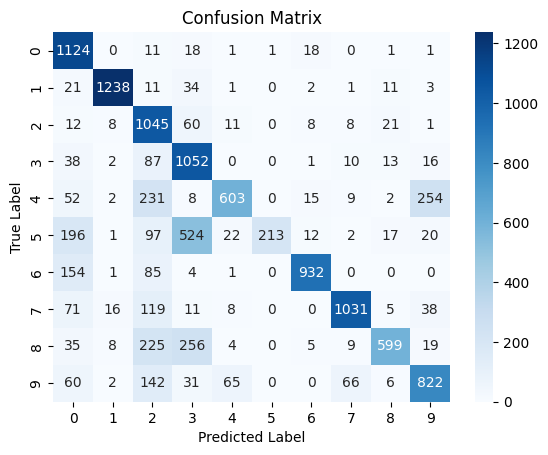

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


test_preds = model.predict(X_test)
test_preds_labels = np.argmax(test_preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

accuracy = accuracy_score(true_labels, test_preds_labels)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(true_labels, test_preds_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Analysis

<h4>Strengths:</h4>

-  RBF networks can model complex, non-linear decision boundaries effectively.
- They are typically faster in training due to the use of K-means for determining the RBF centers.
<h4>Limitations:</h4>

- RBF networks tend to perform poorly if the number of RBF units is either too high or too low.
- Scaling to large datasets can be computationally expensive due to the clustering step.
Choosing an optimal number of RBF units and the gamma parameter requires experimentation.
<h4>Effect of RBF Units:</h4>

- Increasing the number of RBF units usually improves performance by allowing the network to capture finer details of the data.
- However, too many units can lead to overfitting, where the model performs well on training data but poorly on unseen data.